<a href="https://colab.research.google.com/github/suhan-s255/1BM23CS344-SUHAN-S-6THSEM-ML-LAB/blob/main/1BM23CS344_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First 10 rows:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  

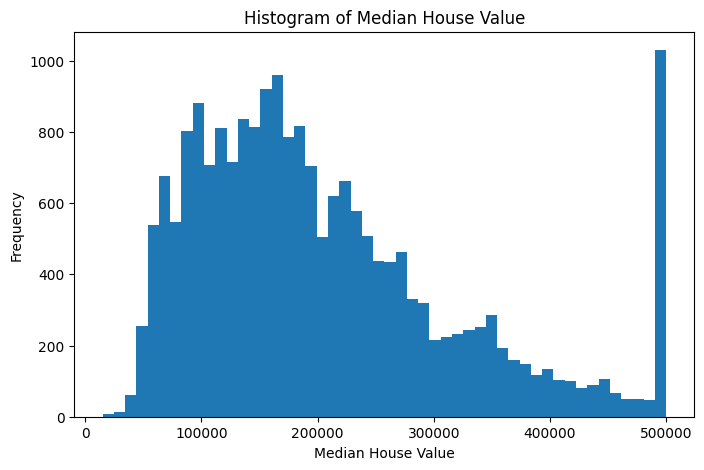

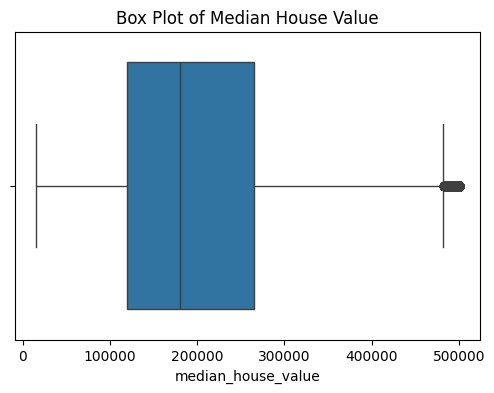


Missing Values Percentage:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

Correlation with Median House Value:
 median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


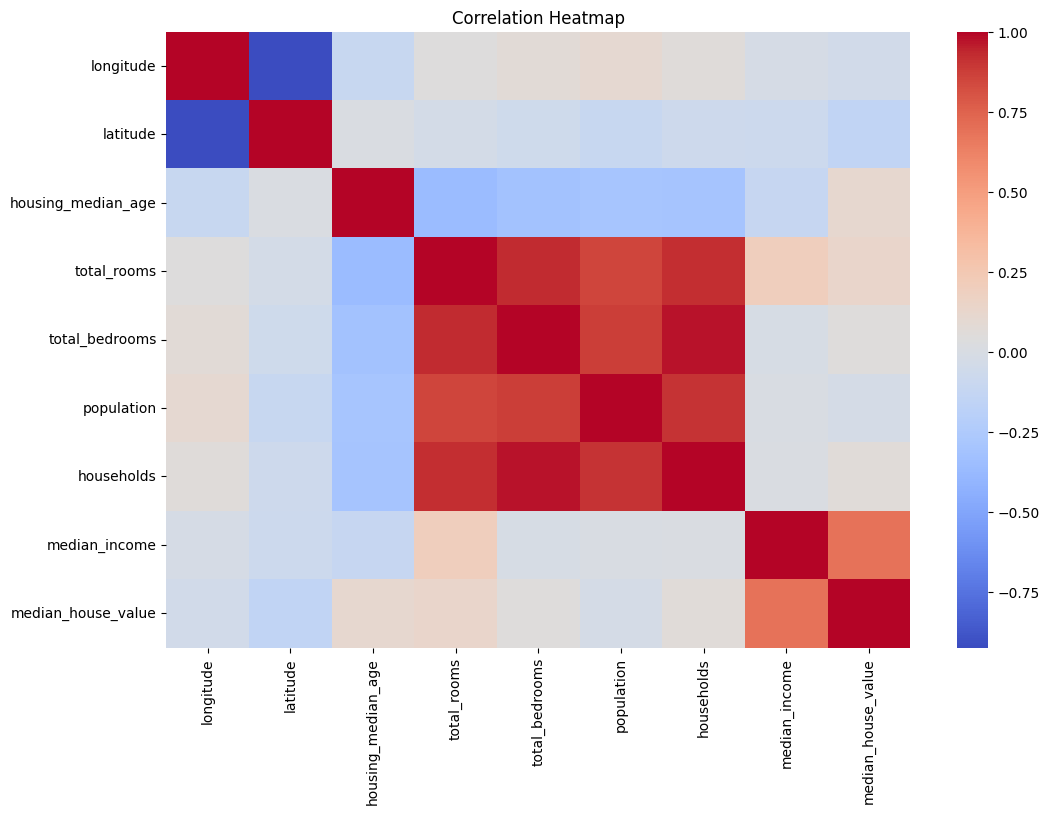

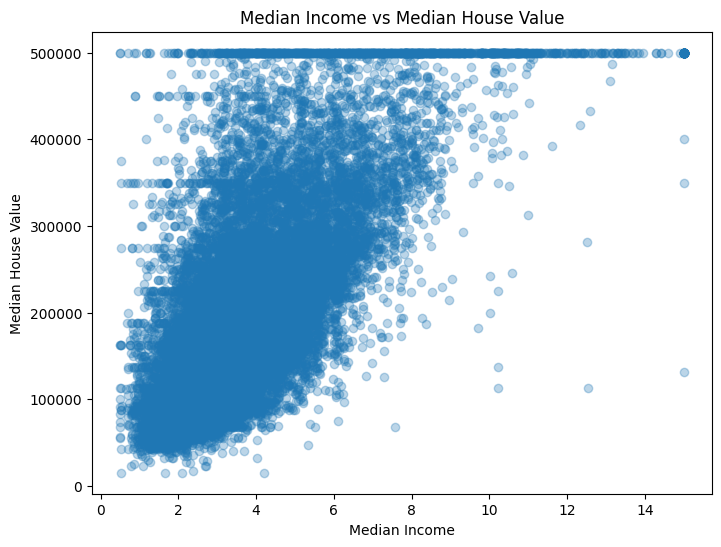


Top 3 Positively Correlated Features:
 median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Name: median_house_value, dtype: float64

Most Negatively Correlated Feature:
 -0.1441602768746574

Model Evaluation Metrics:
RMSE: 70060.52184473518
MAE : 50670.73824097191
R2  : 0.6254240620553606


/tmp/ipython-input-245526863.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nMost Negatively Correlated Feature:\n", corr_target[-1])


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)


print("\nFirst 10 rows:\n", housing.head(10))
print("\nData Types:\n", housing.dtypes)


print("\nBasic Statistics:\n", housing.describe())


plt.figure(figsize=(8, 5))
plt.hist(housing["median_house_value"], bins=50)
plt.title("Histogram of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=housing["median_house_value"])
plt.title("Box Plot of Median House Value")
plt.show()


missing_percentage = housing.isnull().mean() * 100
print("\nMissing Values Percentage:\n", missing_percentage)


imputer = SimpleImputer(strategy="median")
housing["total_bedrooms"] = imputer.fit_transform(housing[["total_bedrooms"]])


housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])


minmax_scaler = MinMaxScaler(feature_range=(0, 1))
numeric_cols = housing_encoded.select_dtypes(include=[np.number]).columns
housing_minmax = housing_encoded.copy()
housing_minmax[numeric_cols] = minmax_scaler.fit_transform(
    housing_encoded[numeric_cols]
)


housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]

housing.drop("income_cat", axis=1, inplace=True)


corr_matrix = housing.corr(numeric_only=True)
print("\nCorrelation with Median House Value:\n",
      corr_matrix["median_house_value"].sort_values(ascending=False))


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


corr_target = corr_matrix["median_house_value"].sort_values(ascending=False)
print("\nTop 3 Positively Correlated Features:\n", corr_target[1:4])
print("\nMost Negatively Correlated Feature:\n", corr_target[-1])


X = housing_encoded.drop("median_house_value", axis=1)
y = housing_encoded["median_house_value"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


